<a href="https://colab.research.google.com/github/naveenbreddy/My-project-works/blob/main/Titanic_Survivors_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my first full scale Kaggle competition project

Instaling Kaggle library to directly download Kaggle datasets from Kaggle using API



In [71]:
#! pip install kaggle

In [72]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [73]:
! cp kaggle.json ~/.kaggle/

In [74]:
! chmod 600 ~/.kaggle/kaggle.json

In [75]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [76]:
import zipfile

In [112]:
#!unzip titanic.zip -d /content/

Archive:  titanic.zip
replace /content/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing all libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [118]:
titan = pd.read_csv('/content/train.csv')

In [119]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Moving the target feature to the right end just for better visibility

In [120]:
df1 = titan.pop('Survived')

In [121]:
titan['survived'] = df1

In [122]:
titan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


We dont need passenger ID for prediction as it does not make any valuable contribution to the survived column

In [123]:
titan.shape

(891, 12)

In [124]:
#statistics 

In [125]:
X1 = titan.isnull().sum()
type(X1)
a= titan.shape[0]
X1 = X1.apply(lambda x: round((x/a)*100),1)

In [126]:
X1 #calculating the percentage of missing values in the dataframe

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            20
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          77
Embarked        0
survived        0
dtype: int64

In [127]:
#Will drop the cabin column as it has more than 77% of nulls in it

In [128]:
titan.drop(['Cabin'],axis=1,inplace = True)

In [129]:
titan.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
survived         0
dtype: int64

In [130]:
#lets look at the datatype for age column to see what we can impute the missing
#vaues with

In [131]:
titan['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

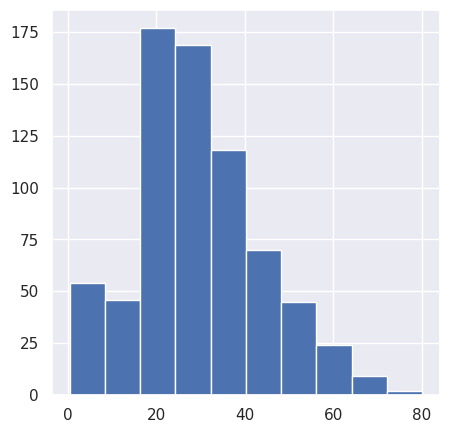

In [132]:
plt.figure(figsize = (5,5))
plt.hist(titan['Age'])

In [133]:
#looks almost like normal distribution so we can impute with the mean

In [134]:
titan['Age'].fillna(titan['Age'].mean(), inplace = True) 

In [135]:
titan.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
survived       0
dtype: int64

In [136]:
#looking at embarked
#titan['Embarked'].describe()
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
titan['Embarked'].fillna(titan['Embarked'].mode()[0],inplace = True)

In [138]:
titan.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
survived       0
dtype: int64

Now that we got all null values sorted! lets look at some distributions to undertand the data better

In [139]:
titan['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

# Data Visualization

In [140]:
sns.set()

<Axes: xlabel='survived', ylabel='count'>

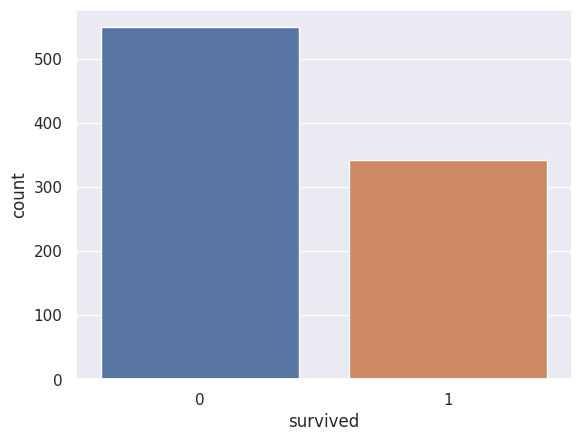

In [141]:
sns.countplot(x = titan['survived'])

<Axes: xlabel='Sex', ylabel='count'>

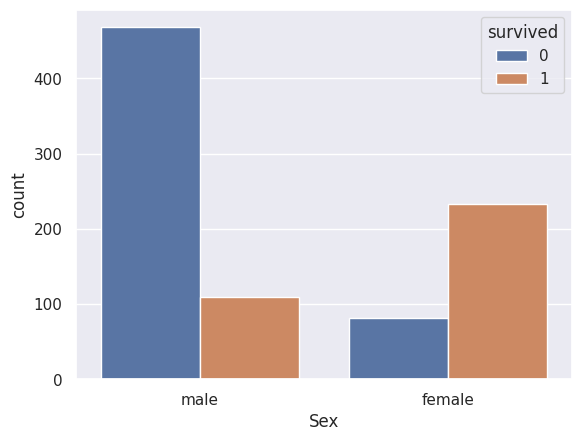

In [142]:
sns.countplot(x = titan['Sex'], hue = titan['survived'])

<Axes: xlabel='Pclass', ylabel='Count'>

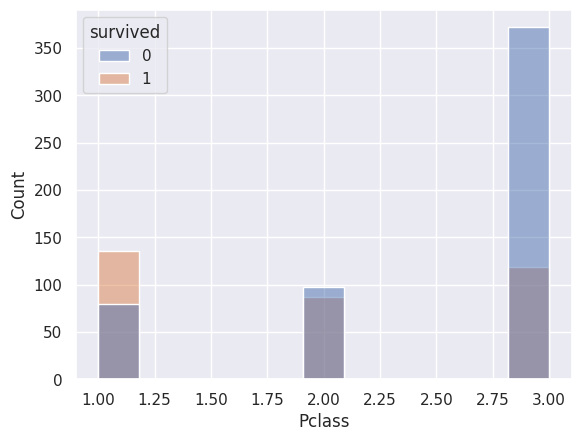

In [143]:
sns.histplot(x = titan['Pclass'], hue = titan['survived'])

<Axes: xlabel='Sex', ylabel='Age'>

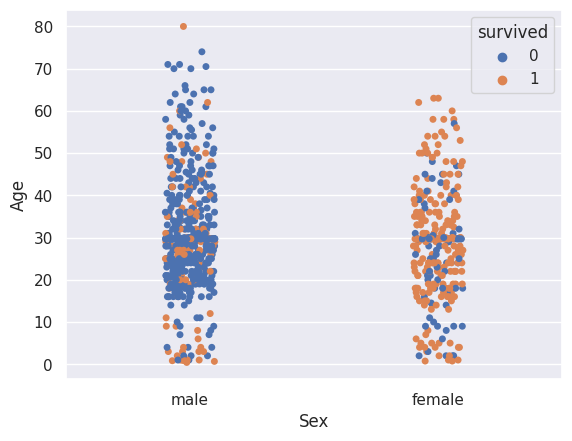

In [144]:
sns.stripplot(x = titan['Sex'], y = titan['Age'], hue = titan['survived'])

<Axes: xlabel='Sex', ylabel='Age'>

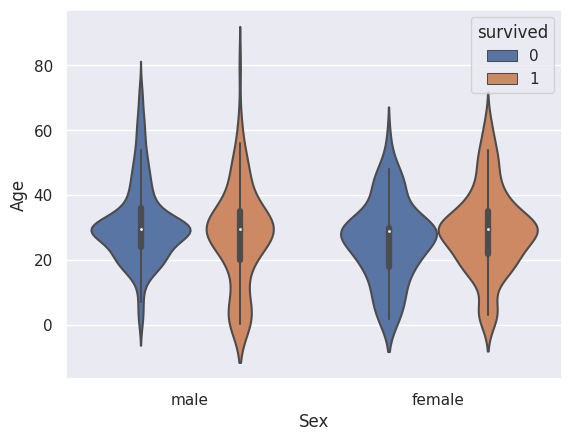

In [145]:
sns.violinplot(x = titan['Sex'], y = titan['Age'], hue = titan['survived'])

# Data preprocessing

In [146]:
titan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [147]:
#we dont need the name for prediction so will drop name

In [148]:
titan.drop(['Name'], axis = 1, inplace = True)

In [149]:
titan.drop(['Ticket'], axis = 1, inplace = True)

In [168]:
titan.drop(['PassengerId'], axis = 1, inplace = True)

In [150]:
titan['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [151]:
titan['Sex'] = titan['Sex'].apply(lambda x : 0 if x == 'male' else 1)

In [152]:
titan['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [158]:
titan.replace({'Embarked':{'S':0, 'C':1, 'Q' :2}}, inplace= True)

In [159]:
titan['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [169]:
titan.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0


separating target and predictor variables

In [170]:
X = titan[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = titan[['survived']]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [183]:
#%%html
#<marquee style='width: 50%; color: Green;'>Need to scale the two columns to get them to normalized values
#Need to check for multi collinearity using variance inflation factor. if VIF >5 then theres</marquee>